# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import os
orig_working_directory=os.getcwd()
orig_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Clementine-GWU-HW-Unit6\\python-api-challenge\\WeatherPy\\starter_code'

In [2]:
os.chdir(os.path.join('..','..','..','..'))
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

In [3]:
#!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [6]:
cities

['carnarvon',
 'arraial do cabo',
 'suoyarvi',
 'avarua',
 'rikitea',
 'khatanga',
 'syracuse',
 'manaus',
 'busselton',
 'illoqqortoormiut',
 'kodiak',
 'vaitape',
 'butaritari',
 'mataura',
 'fortuna',
 'hermanus',
 'mahebourg',
 'ushuaia',
 'belushya guba',
 'ivolginsk',
 'mantua',
 'chuy',
 'castro',
 'kodinsk',
 'terracina',
 'hobart',
 'chokurdakh',
 'jamestown',
 'saint-philippe',
 'dalvik',
 'cabo san lucas',
 'aklavik',
 'muros',
 'aragats',
 'gurskoye',
 'bandarbeyla',
 'vaini',
 'longyearbyen',
 'new norfolk',
 'ilulissat',
 'barrow',
 'imeni poliny osipenko',
 'mar del plata',
 'dalbandin',
 'nalut',
 'sao filipe',
 'port augusta',
 'bambous virieux',
 'saleaula',
 'vanimo',
 'geraldton',
 'mehran',
 'tiksi',
 'vallenar',
 'opuwo',
 'taolanaro',
 'airai',
 'szedres',
 'manhuacu',
 'kapaa',
 'havelock',
 'kruisfontein',
 'boulder',
 'hithadhoo',
 'mount isa',
 'east london',
 'saskylakh',
 'yumen',
 'alice springs',
 'tuatapere',
 'berdigestyakh',
 'reconquista',
 'douglas',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
print("Beginning Data Retrieval")
print("------------------------")

x=0
i=1
for city in cities:
    try:
        x+=1
        print(f"Processing Record {x} of Set{i} | {city}")
        if x==50:
            x=0
            i+=1
            
    except:    
        print("City not found. Skipping...")

print("-------------------------")        
print("Data Retreival Complete")     
print("-------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set1 | carnarvon
Processing Record 2 of Set1 | arraial do cabo
Processing Record 3 of Set1 | suoyarvi
Processing Record 4 of Set1 | avarua
Processing Record 5 of Set1 | rikitea
Processing Record 6 of Set1 | khatanga
Processing Record 7 of Set1 | syracuse
Processing Record 8 of Set1 | manaus
Processing Record 9 of Set1 | busselton
Processing Record 10 of Set1 | illoqqortoormiut
Processing Record 11 of Set1 | kodiak
Processing Record 12 of Set1 | vaitape
Processing Record 13 of Set1 | butaritari
Processing Record 14 of Set1 | mataura
Processing Record 15 of Set1 | fortuna
Processing Record 16 of Set1 | hermanus
Processing Record 17 of Set1 | mahebourg
Processing Record 18 of Set1 | ushuaia
Processing Record 19 of Set1 | belushya guba
Processing Record 20 of Set1 | ivolginsk
Processing Record 21 of Set1 | mantua
Processing Record 22 of Set1 | chuy
Processing Record 23 of Set1 | castro
Processing Record 24 of Set1 | k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
import os
curr_working_directory=os.getcwd()
curr_working_directory

'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW'

In [9]:
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

In [10]:
# Import API key
from api_keys import weather_api_key

In [11]:
url="http://api.openweathermap.org/data/2.5/weather?"
units='metric'
query_url=f"{url}appid={weather_api_key}&units={units}&q="
response=requests.get(query_url+city).json()
response  

{'coord': {'lon': 152.92, 'lat': -31.43},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 16.11,
  'feels_like': 16.38,
  'temp_min': 16.11,
  'temp_max': 16.11,
  'pressure': 1011,
  'humidity': 96},
 'wind': {'speed': 2.17, 'deg': 336},
 'clouds': {'all': 100},
 'dt': 1590031475,
 'sys': {'type': 3,
  'id': 2000886,
  'country': 'AU',
  'sunrise': 1590006766,
  'sunset': 1590044241},
 'timezone': 36000,
 'id': 2152659,
 'name': 'Port Macquarie',
 'cod': 200}

In [12]:
#response['name']
response['dt']


1590031475

In [13]:
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f"city {city} not found")
        pass

city illoqqortoormiut not found
city belushya guba not found
city gurskoye not found
city saleaula not found
city taolanaro not found
city tumannyy not found
city barentsburg not found
city dzhusaly not found
city grand centre not found
city nizhneyansk not found
city karaul not found
city kamenskoye not found
city artyk not found
city juifang not found
city mooi river not found
city sentyabrskiy not found
city kuva not found
city fevralsk not found
city kuala krai not found
city karkaralinsk not found
city mys shmidta not found
city tarudant not found
city tsihombe not found
city wahran not found
city attawapiskat not found
city meyungs not found
city chagda not found
city bolshoy tsaryn not found
city umzimvubu not found
city marcona not found
city tapaua not found
city dien bien not found
city hihifo not found
city burica not found
city malwan not found
city ngukurr not found
city galiwinku not found
city tungkang not found
city bengkalis not found
city bargal not found
city orgun n

In [14]:
weather_dict={
    "City":name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

city_weather_df=pd.DataFrame(weather_dict)
city_weather_df.head()
city_weather_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [15]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,25.00,14,0,5.70,AU,1590031586
1,Arraial do Cabo,-22.97,-42.03,22.50,74,30,8.16,BR,1590031586
2,Suoyarvi,62.08,32.35,1.90,86,100,6.55,RU,1590031586
3,Avarua,-21.21,-159.78,26.00,65,75,4.10,CK,1590031586
4,Rikitea,-23.12,-134.97,24.52,74,100,8.40,PF,1590031586


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.017673,13.572007,18.212558,68.031972,49.031972,3.634831,1.590032e+09
std,33.033880,91.345143,8.979049,21.639370,38.985841,2.347779,6.983650e+01
min,-54.800000,-175.200000,-5.000000,8.000000,0.000000,0.150000,1.590031e+09
25%,-5.355000,-68.420000,11.735000,54.000000,5.000000,2.000000,1.590032e+09
50%,25.570000,18.720000,19.000000,73.000000,47.000000,3.100000,1.590032e+09
75%,48.120000,94.335000,26.000000,85.000000,90.000000,5.025000,1.590032e+09
max,78.220000,178.000000,38.870000,100.000000,100.000000,15.590000,1.590032e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
select_indices = list(np.where(city_weather_df['Humidity']>100)[0])
select_indices

[]

In [18]:
city_weather_df.iloc[select_indices]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_weather_df.drop(select_indices,inplace=False)


In [20]:
#confirm the rows were dropped
#clean_city_data.loc[clean_city_data['Humidity']>100,:]
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.017673,13.572007,18.212558,68.031972,49.031972,3.634831,1.590032e+09
std,33.033880,91.345143,8.979049,21.639370,38.985841,2.347779,6.983650e+01
min,-54.800000,-175.200000,-5.000000,8.000000,0.000000,0.150000,1.590031e+09
25%,-5.355000,-68.420000,11.735000,54.000000,5.000000,2.000000,1.590032e+09
50%,25.570000,18.720000,19.000000,73.000000,47.000000,3.100000,1.590032e+09
75%,48.120000,94.335000,26.000000,85.000000,90.000000,5.025000,1.590032e+09
max,78.220000,178.000000,38.870000,100.000000,100.000000,15.590000,1.590032e+09


In [21]:
os.chdir(orig_working_directory)
os.chdir(os.path.join('..'))
os.getcwd()


'C:\\Users\\clemi\\Desktop\\Clementine-GWU-HW\\Clementine-GWU-HW-Unit6\\python-api-challenge\\WeatherPy'

In [22]:
# Export the City_Data into a csv
clean_city_data.to_csv('output_data/City_Data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
#clean_city_data

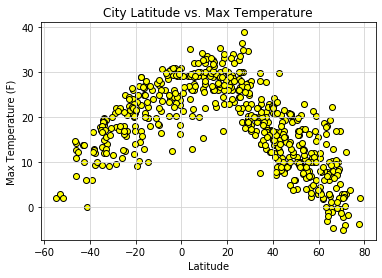

In [24]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_temp.png")
plt.show()

The above plot is showing the relationship between Latitude and Max Temperature for each city in our data set. The positive latitudes (latitude >=0) represent latitudes in the northern hemisphere with zero being the equator. The further north we go from the equator, the lower the Max Temperature and the further south we move from the equator, the lower the Max temperature.

## Latitude vs. Humidity Plot

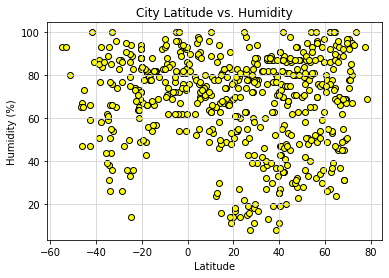

In [25]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

The code above is plotting the relationship between the latitudes of each city in our data set and the percent humidity at those latitudes.Closer to the equator, minimum humidity in 50% or greater. Farther from the equator, in either direction, humidity ranges anywhere from 0 to 100%.

## Latitude vs. Cloudiness Plot

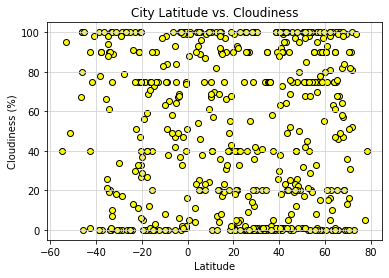

In [26]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

The code above plots the the relationship between latitude of each city in our data set and cloudiness. There is no apparent relationship between the two.

## Latitude vs. Wind Speed Plot

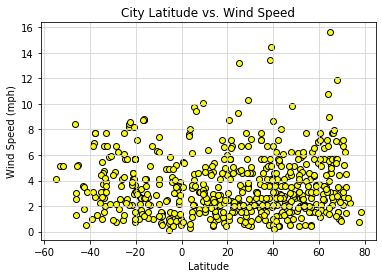

In [27]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/lat_vs_windspeed.png")
plt.show()

The code above plots the relationship between the latitude of each city in our dataset and the coreponding windspeed at that latitude. Majority of the winspeeds are less than 10mph accross all the latitudes but a few cities in the northern hemisphere have wind speeds greater than 10mph

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy.stats import linregress

In [29]:
# Create Northern and Southern Hemisphere DataFrames
northern=clean_city_data.loc[clean_city_data['Lat']>=0]
southern=clean_city_data.loc[clean_city_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is:-0.8408747600960673


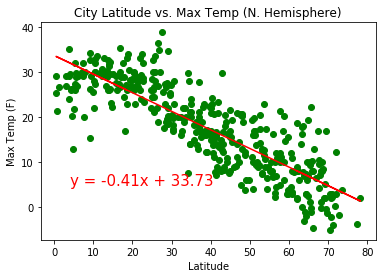

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"], northern["Max Temp"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Max Temp"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(4,5),fontsize=15,color="red")

plt.title("City Latitude vs. Max Temp (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_max_temp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-squared is:0.738855224745137


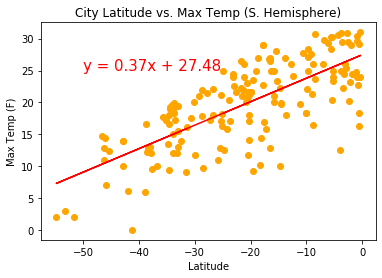

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"], southern["Max Temp"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Max Temp"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.title("City Latitude vs. Max Temp (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_max_temp.png")
plt.show()



The two plots above explore the relationship between latitude and maximum temperature by hemisphere. At the Northern Hemisphere, there is a negative relationship between latitude and max temp. This implies that the further away we move from the equator towards the north pole, the lower the temperature. The r-square value here is -0.84, which implies that the regression line fits worse than using a horizontal line. At the Southern Hemisphere, there is a positive relationship between latitude and max temperature. This implies that the closer you move towards the equator, the higher the max temp. The r-squared value is around 0.74 which indicates that the model explains about 74% of the variability of the response data around it's mean.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is:0.060868301477864324


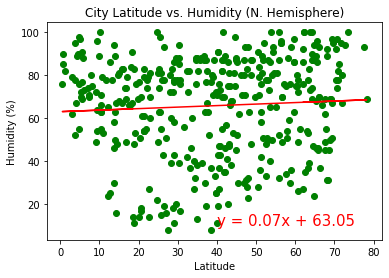

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Humidity"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Humidity"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.title("City Latitude vs. Humidity (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-squared is:0.2279879256587849


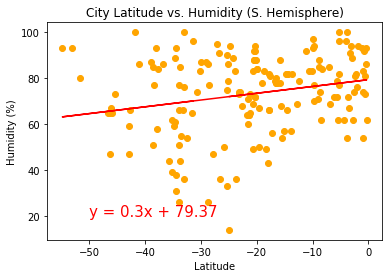

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Humidity"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Humidity"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.title("City Latitude vs. Humidity (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_humidity.png")
plt.show()

The two plots above explore the relationship between latitude and humidty by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and humidity. This implies that the further away we move from the equator towards the north pole, the higher the humidity. The r-square value here 0.06, which implies that the model explains about 6% of the variability of the response data around it's mean. At the Southern Hemisphere, there is also a positive relationship between latitude and humidity. This implies that the closer you move towards the equator from the south pole, the higher the humidity. The r-squared value here is around 0.22 which indicates that the model explains about 22% of the variablity of the response data around it's mean.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is:0.028286444059425868


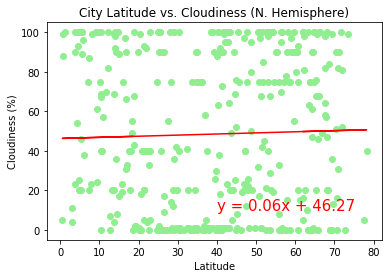

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Cloudiness"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Cloudiness"],facecolors="lightgreen")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

plt.title("City Latitude vs. Cloudiness (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-squared is:-0.03591405706455579


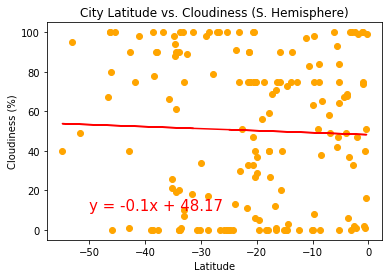

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Cloudiness"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Cloudiness"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.title("City Latitude vs. Cloudiness (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_cloudiness.png")
plt.show()

The two plots above explore the relationship between latitude and cloudiness by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and cloudiness. This implies that the further away we move from the equator towards the north pole, the higher the cloudiness. The r-square value here 0.028, which implies that the model explains about 3% of the variability of the response data around it's mean. At the Southern Hemisphere, there is a negative relationship between latitude and cloudiness. This implies that the closer you move towards the equator from the south pole, the lower the cloudiness. The r-squared value here is around -0.035 which indicates that the regression line fits worse than using a horizontal line.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is:0.06764658469336969


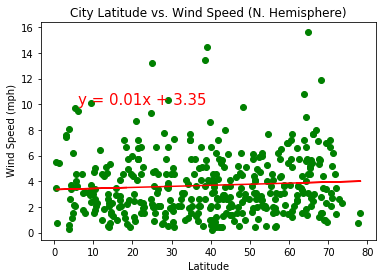

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Lat"],northern["Wind Speed"])
regress_values = northern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern["Lat"],northern["Wind Speed"],facecolors="green")
plt.plot(northern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("City Latitude vs. Wind Speed (N. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mph)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/north_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-squared is:-0.23331737882362097


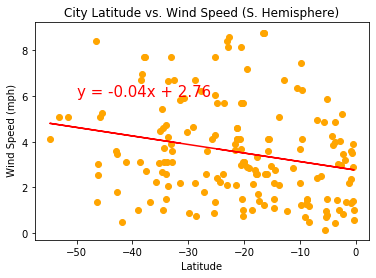

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Lat"],southern["Wind Speed"])
regress_values = southern["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern["Lat"],southern["Wind Speed"],facecolors="orange")
plt.plot(southern["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")

plt.title("City Latitude vs. Wind Speed (S. Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mph)")
print(f"the r-squared is:{rvalue}")

plt.savefig("Images/south_wind_speed.png")
plt.show()

The two plots above explore the relationship between latitude and wind speed by hemisphere. At the Northern Hemisphere, there is a positive relationship between latitude and wind speed. This implies that the further away we move from the equator towards the north pole, the higher the wind speed. The r-square value here 0.067, which implies that the model explains about 7% of the variability of the response data around it's mean. At the Southern Hemisphere, there is a negative relationship between latitude and wind speed. This implies that the closer you move towards the equator from the south pole, the lower the windspeed. The r-squared value here is around -0.233 which indicates that the regression line fits worse than using a horizontal line